In [2]:
from math import hypot, pi, cos, sin
from PIL import Image
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

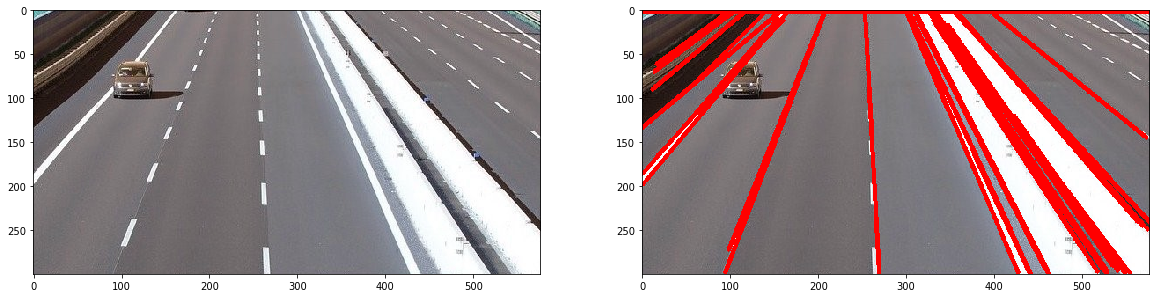

In [3]:
img = cv2.imread('road.jpg', cv2.IMREAD_COLOR) # road.png is the filename
img_copy=img.copy()
# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 69, minLineLength=10, maxLineGap=250)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)


# Show result
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img_copy)
plt.subplot(1,2,2)
plt.imshow(img)

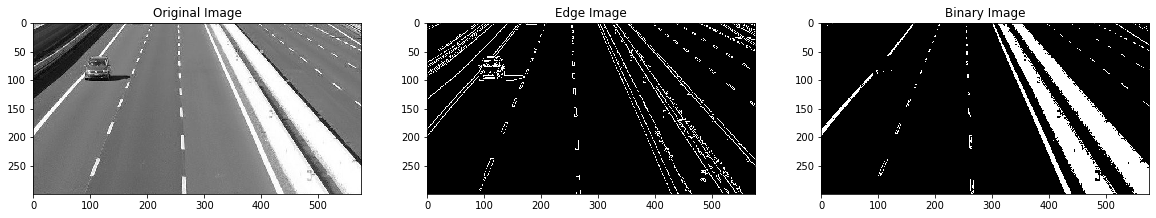

In [4]:
thresh = 235
plt.figure(figsize=(20,10))
img=cv2.imread('road.jpg',0)
BW = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]
edges = cv2.Canny(img,100,200)
plt.subplot(131),plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.subplot(133),plt.imshow(BW,cmap='gray')
plt.title('Binary Image')
plt.show()

In [5]:
def hough(img):

    thetaAxisSize = 460 #Width of the hough space image
    rAxisSize = 360 #Height of the hough space image
    rAxisSize= int(rAxisSize/2)*2 #we make sure that this number is even

    #img = edges.load()
    w, h = edges.shape
    
    print(w,h)
    #plt.imshow(img)

    houghed_img = Image.new("L", (thetaAxisSize, rAxisSize), 0)
    pixel_houghed_img = houghed_img.load()
    

    max_radius = hypot(w, h)
    d_theta = pi / thetaAxisSize
    d_rho = max_radius / (rAxisSize/2) 

    #Accumulator
    for x in range(0, w):
        for y in range(0, h):

            threshold = 255
            col = img[x, y]
            if col >= threshold: #determines for each pixel at (x,y) if there is enough evidence of a straight line at that pixel.

                for vx in range(0, thetaAxisSize):
                    theta = d_theta * vx #angle between the x axis and the line connecting the origin with that closest point.
                    rho = x*cos(theta) + y*sin(theta) #distance from the origin to the closest point on the straight line
                    vy = rAxisSize/2 + int(rho/d_rho+0.5)
                    pixel_houghed_img[vx, vy] += 1 #voting

    return houghed_img, rAxisSize, d_rho, d_theta

In [6]:
houghed_img, rAxisSize, d_rho, d_theta  = hough(edges)

300 577


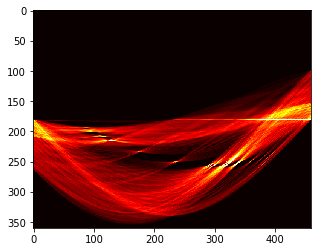

In [7]:
plt.imshow(houghed_img, cmap='hot')

In [8]:
def find_maxima(houghed_img, rAxisSize, d_rho, d_theta):

    w, h = houghed_img.size
    pixel_houghed_img = houghed_img.load()
    maxNumbers = 9
    ignoreRadius = 10
    maxima = [0] * maxNumbers
    rhos = [0] * maxNumbers
    thetas = [0] * maxNumbers

    for u in range(0, maxNumbers):

        value = 0 
        xposition = 0
        yposition = 0

        #find maxima in the image
        for x in range(0, w):
            for y in range(0, h):

                if(pixel_houghed_img[x,y] > value):

                    value = pixel_houghed_img[x, y]
                    xposition = x
                    yposition = y

        #Save Maxima, rhos and thetas
        maxima[u] = value
        rhos[u] = (yposition - rAxisSize/2) * d_rho
        thetas[u] = xposition * d_theta

        pixel_houghed_img[xposition, yposition] = 0

        #Delete the values around the found maxima
        radius = ignoreRadius

        for vx2 in range (-radius, radius): #checks the values around the center
            for vy2 in range (-radius, radius): #checks the values around the center
                x2 = xposition + vx2 #sets the spectated position on the shifted value 
                y2 = yposition + vy2

                if not(x2 < 0 or x2 >= w):
                    if not(y2 < 0 or y2 >= h):

                        pixel_houghed_img[x2, y2] = 0

    return maxima, rhos, thetas

In [9]:
img_copy = np.ones(edges.shape)

maxima, rhos, thetas = find_maxima(houghed_img, rAxisSize, d_rho, d_theta)

In [10]:
for t in range(0, len(maxima)):
    a = math.cos(thetas[t])
    b = math.sin(thetas[t])
    x = a * rhos[t]
    y = b * rhos[t]
    pt1 = (int(x + 500*(-b)), int(y + 500*(a)))
    pt2 = (int(x - 500*(-b)), int(y - 500*(a)))
    cv2.line(img_copy, pt1, pt2, (0,0,255), 3)

Text(0.5, 1.0, 'lines')

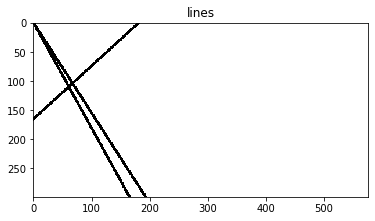

In [11]:
plt.imshow(img_copy,cmap='gray')
plt.title('lines')